## Matrix Plots

The heatmap is the most common type of matrix plot and can be easily created by Seaborn. These types of matrix plots can be useful for quickly seeing trends in a dataset. 

In [1]:
# import all modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the DataFrame
df_0 = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/4eead0f82a80136cdc0068cfb54b97fe47c23c15/daily_show_guests_cleaned.csv")

In [2]:
df_0.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


To generat heatmap, *__heatmap()__* function is used.\
*__heatmap()__* function expects the data to be in a matrix.\ 
And in order to create data of that format, pandas *__crosstab()__* function builds a table to summarize. We can also use aggfunc argument.

YEAR            1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Group                                                                        
Academic           0     0     2     0     4     1    12     9    13     5   
Acting           108   100    92    84    74    51    44    44    25    26   
Advocacy           0     1     0     1     0     4     0     0     2     3   
Athletics          0     3     1     2     0     2     2     5     4     1   
Business           0     1     0     0     0     2     1     1     2     1   
Clergy             0     0     0     1     1     1     0     0     1     0   
Comedy            25    12    11     5    12     7     5     8     9     7   
Consultant         0     0     0     0     1     4     1     4     2     3   
Government         0     0     2     1     2     3     1     3     1     0   
Media             11    21    31    42    41    45    54    47    47    77   
Military           0     0     0     0     0     0     1     1  

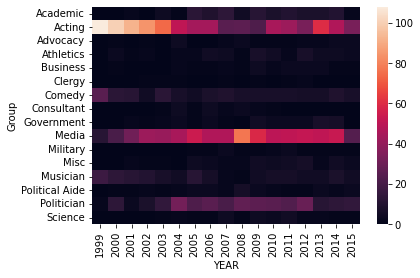

In [3]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df_0["Group"], df_0["YEAR"])
print(pd_crosstab)

# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

#### Customizing Heatmaps

*__annot = True__* argument to turn on annotations on individual cells.\
*__fmt = 'd'__* argument enures that the results are displayed as integers.\
*__cmap = "YlGnBu"__* argument to change the shading we use.\
*__cbar = False__* argument to not display colorbars.\
*__center = df_crosstab.loc[a,b]__* argument to centre heatmap around figure points a and b.

#### Plotting a correlation matrix

One common usage for a heatmap is to visually represent the correlation between variables. pandas DataFrames have a *___corr()__* function that calculates the correlation between the values in the columns. The output of this function is ideally structured to be displayed as a heatmap. 

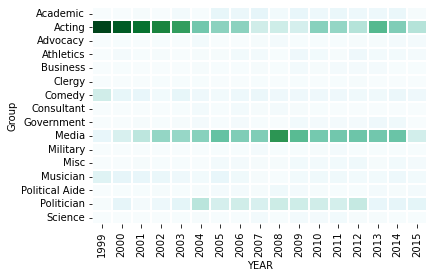

<Figure size 432x288 with 0 Axes>

In [4]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(df_0["Group"], df_0["YEAR"])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#Show the plot
plt.show()
plt.clf()

In [5]:
# Read in the DataFrame
df = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/794e0759b73a2d80baa5d8fb88636a47965139d3/college_datav3.csv")

## FacetGrid, Catplot and lmplot

#### 1. FacetGrid varying by row

C:\Users\Mridul Sharma\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


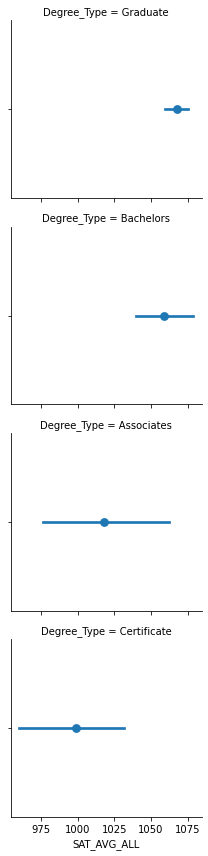

<Figure size 432x288 with 0 Axes>

In [6]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

#### 2. Catplot

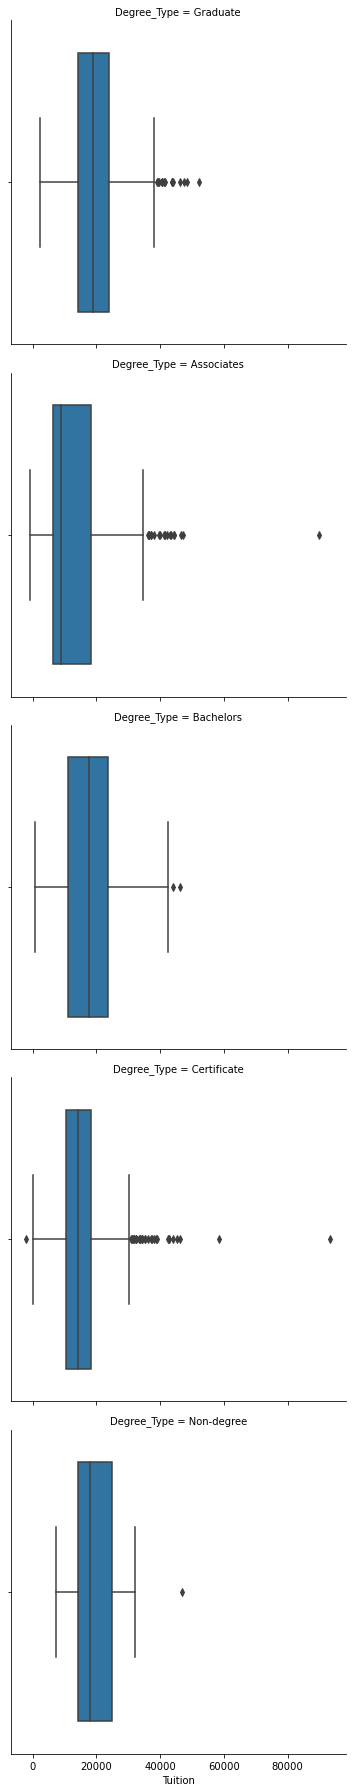

<Figure size 432x288 with 0 Axes>

In [7]:
# Create a factor plot that contains boxplots of Tuition values
sns.catplot(data=df,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

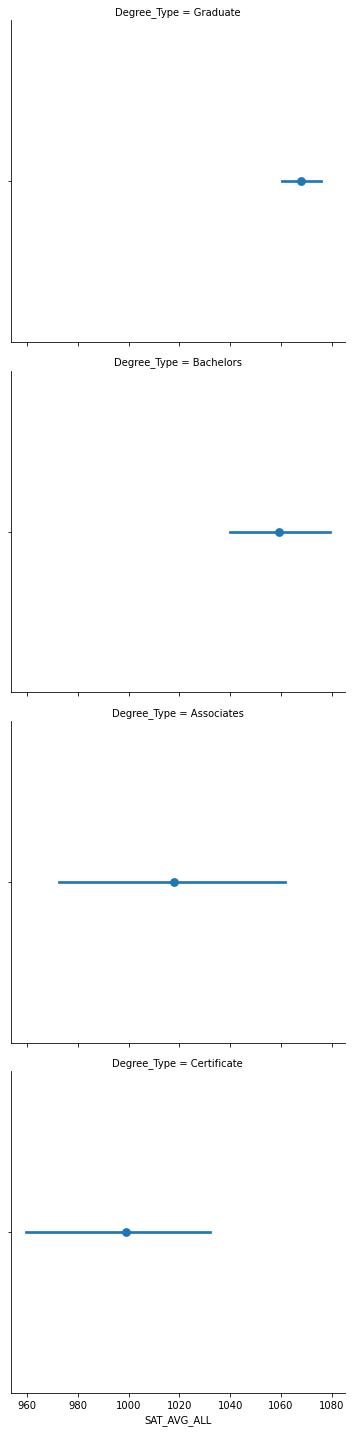

<Figure size 432x288 with 0 Axes>

In [8]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

#### 3. FacetGrid varying by column

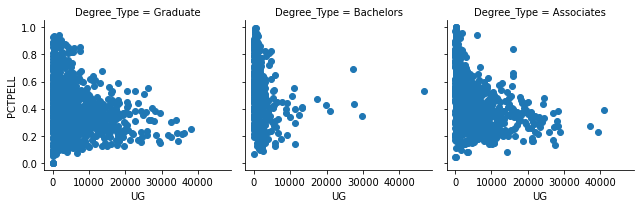

<Figure size 432x288 with 0 Axes>

In [9]:
degree_ord = ['Graduate', 'Bachelors', 'Associates']
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

#### 4. lmplot

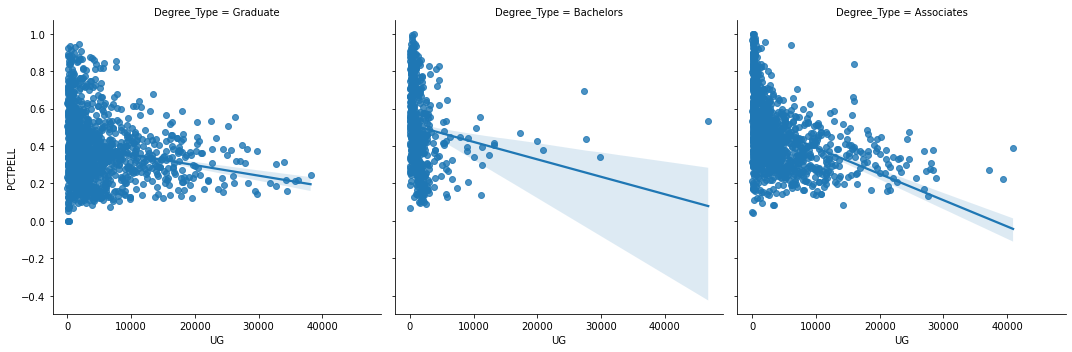

<Figure size 432x288 with 0 Axes>

In [10]:
# Re-create the previous plot as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()
plt.clf()

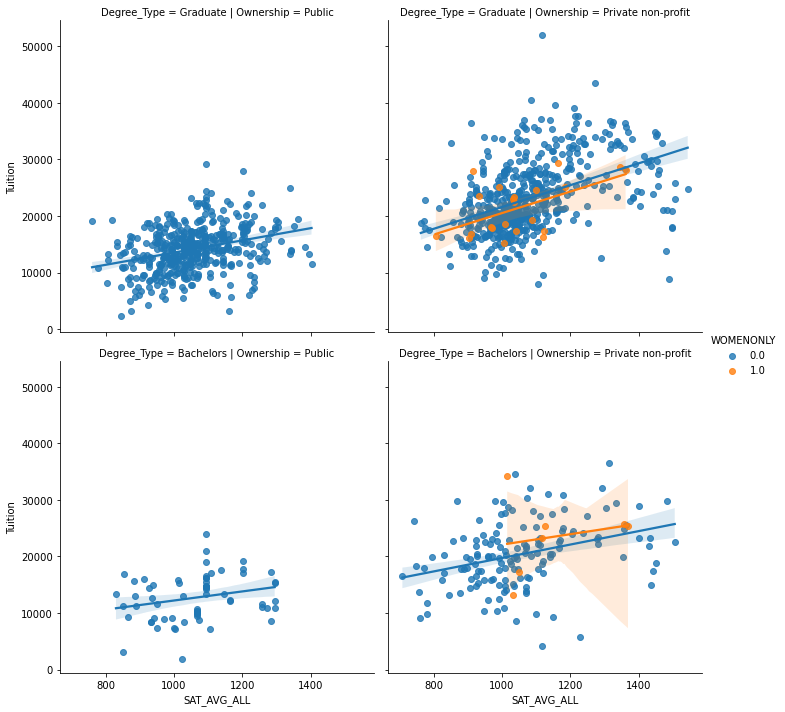

<Figure size 432x288 with 0 Axes>

In [11]:
inst_ord = ['Public', 'Private non-profit']
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()

## PairGrid and Pairplot

In [12]:
df_new = pd.read_csv("https://assets.datacamp.com/production/repositories/2210/datasets/1a8176dc594fc0a13a9f1a7b207d30ed312f2e4a/insurance_premiums.csv")

#### 1. PairGrid

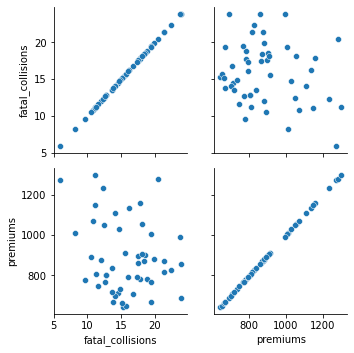

<Figure size 432x288 with 0 Axes>

In [13]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df_new, vars=["fatal_collisions", "premiums"])
g2 = g.map(sns.scatterplot)

plt.show()
plt.clf()

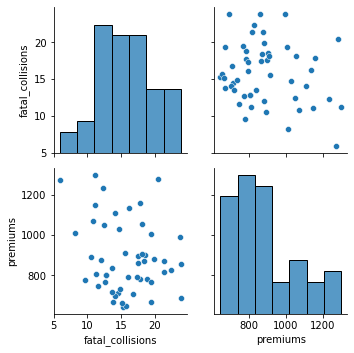

<Figure size 432x288 with 0 Axes>

In [14]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df_new, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(sns.histplot)
g3 = g2.map_offdiag(sns.scatterplot)

plt.show()
plt.clf()

#### 2. Pairplot

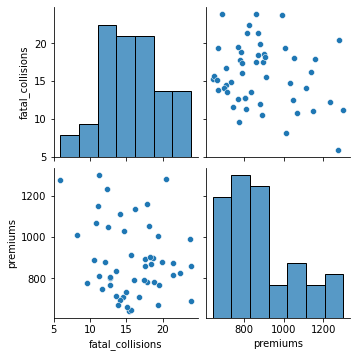

<Figure size 432x288 with 0 Axes>

In [15]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df_new,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        diag_kind = 'hist')

plt.show()
plt.clf()

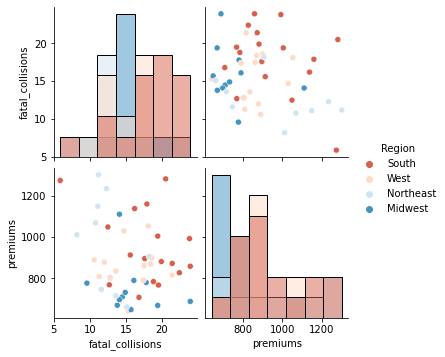

<Figure size 432x288 with 0 Axes>

In [16]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df_new,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        diag_kind = 'hist',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

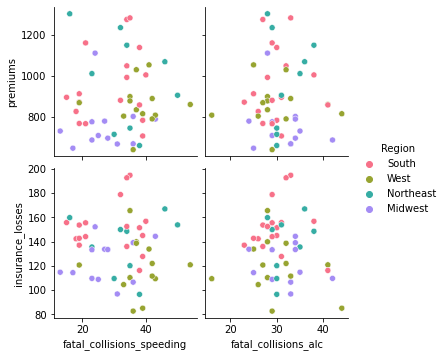

<Figure size 432x288 with 0 Axes>

In [17]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df_new,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars = ['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

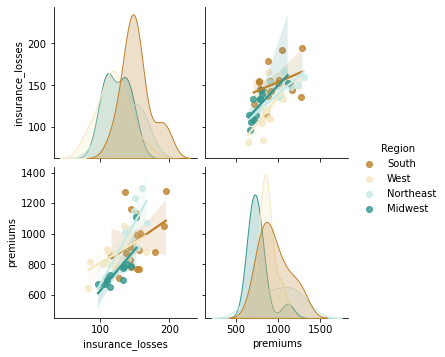

<Figure size 432x288 with 0 Axes>

In [18]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df_new,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

## JointGrid and Jointplot

In [19]:
my_df = pd.read_csv('https://assets.datacamp.com/production/repositories/2210/datasets/fb4f2c1039e3df2c2e2624a8c95de5a1980861c6/bike_share.csv')

#### 1. JointGrid

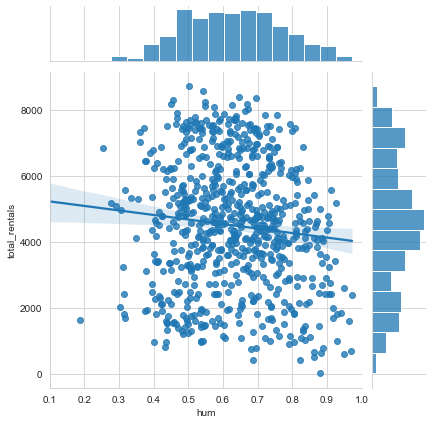

<Figure size 432x288 with 0 Axes>

In [20]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
                  y="total_rentals",
                  data=my_df,
                  xlim=(0.1, 1.0))

g.plot(sns.regplot, sns.histplot)

plt.show()
plt.clf()

#### 2. JointPlot

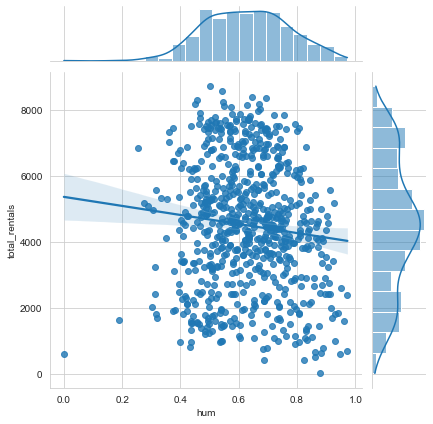

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a jointplot similar to the JointGrid
sns.jointplot(x="hum",
              y="total_rentals",
              kind='reg',
              data=my_df)

plt.show()
plt.clf()

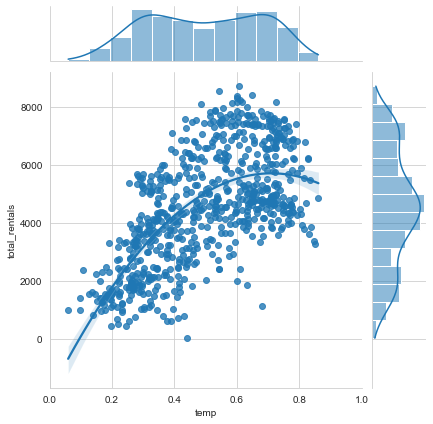

<Figure size 432x288 with 0 Axes>

In [22]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
              y="total_rentals",
              kind='reg',
              data=my_df,
              order=2,
              xlim=(0, 1))

plt.show()
plt.clf()

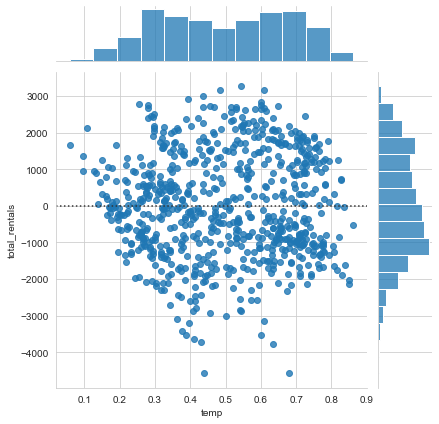

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
              y="total_rentals",
              kind='resid',
              data=my_df,
              order=2)

plt.show()
plt.clf()

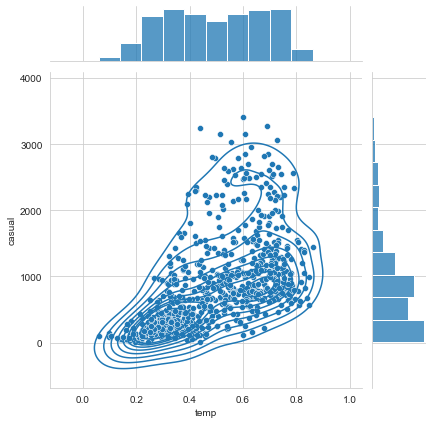

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = sns.jointplot(x="temp",
                   y="casual",
                   kind='scatter',
                   data=my_df,
                   marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()

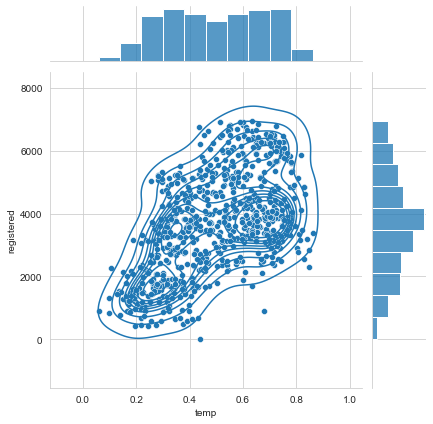

<Figure size 432x288 with 0 Axes>

In [25]:
# Replicate the previous plot but only for registered riders
g = sns.jointplot(x="temp",
                   y="registered",
                   kind='scatter',
                   data=my_df,
                   marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()